# Wrangling & Analyzing  WeRateDogs Twitter Data

 Goal of Project: Wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information. Additional gathering using the Twitter API, then assessing and cleaning was required for great analyses and visualizations.

# Gathering Data

### 1 - Enhanced Twitter Archive:
I already have The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything. One column the archive does contain though: each tweet's text, which used to extract rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo) to make this Twitter archive "enhanced." Of the 5000+ tweets,which is already filtered for tweets with ratings only (there are 2356). It's in a file called 'twitter-archive-enhanced.csv'

In [1]:
# import the needing libraries
import pandas as pd
import requests
import os
import io
import tweepy
import time
import json
import datetime
import matplotlib.pyplot as plt

In [14]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


### 2- Image Predictions File

David Venturi(Udacity's Instructor) has ran every image in the WeRateDogs Twitter archive through a neural network that can classify breeds of dogs*. The results: a table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images).This file (image_predictions.tsv) is hosted on Udacity's servers in the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv .


In [14]:
# Programmatically download the dog image prediction files from 
# the Udacity server using Request library
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

with open(os.path.join(folder_name,
                      url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [15]:
# saving the downloaded file
image_predictions = pd.read_table('image_predictions/image-predictions.tsv',
                       sep='\t')

In [17]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


### 3- Additional Data via the Twitter API (Tweepy):

Retweet count and favorite count are two of the notable column omissions. Fortunately, this additional data can be gathered by anyone who has access to data for the 3000 most recent tweets, at least using the API 'Tweepy'. But, because I have the WeRateDogs Twitter archive and specifically the tweet IDs within it, can gather this data for all 5000+.

In [6]:
consumer_key = 'rPOwhbTrxAIucynmaGMUUtp5x'
consumer_secret = 'TR5zhPRByPmcEHbbee9rFvANi4V4oqLv3wmLUguFcyii1hT2ll'
access_token = '1075286160-TQsTRqSOqs3fjDl5006UrMS8UFnAvFEGXRXAzEk'
access_secret = 'nCPCLY2p1hHWvWnByq22kOxOTaYn9iwOmJPrTaxopp9CG'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [7]:
twitter_id = list(twitter_archive['tweet_id'])
tweet_data  = {}
for tweet_id in twitter_id:
    try:
        start = time.time()
        tweet_status  = api.get_status(tweet_id,
                                wait_on_rate_limit=True, 
                                wait_on_rate_limit_notify=True)
        tweet_data[str(tweet_id)] = tweet_status._json
        end = time.time()
        print(end - start)
    except:
        print("Error for: " + str(tweet_id))

0.18955469131469727
0.16846394538879395
0.1714613437652588
0.17233037948608398
0.1752607822418213
0.22191309928894043
0.1666865348815918
0.1798553466796875
0.17322182655334473
0.17754554748535156
0.1680140495300293
0.1714322566986084
0.1879115104675293
0.1713428497314453
0.17820143699645996
0.18229961395263672
0.17142534255981445
0.1747748851776123
0.17772817611694336
Error for: 888202515573088257
0.1666722297668457
0.19039297103881836
0.17377424240112305
0.17901349067687988
0.2338864803314209
0.17521262168884277
0.18245601654052734
0.18958020210266113
0.1653594970703125
0.1741197109222412
0.18698930740356445
0.16867971420288086
0.19553089141845703
0.1771833896636963
0.16566824913024902
0.16955208778381348
0.1943349838256836
0.17737555503845215
0.173675537109375
0.16854119300842285
0.17491960525512695
0.3565247058868408
0.18212318420410156
0.3240623474121094
0.3261270523071289
0.16726326942443848
0.19068527221679688
0.17490577697753906
0.1775798797607422
0.23502349853515625
0.168968439

0.1793808937072754
0.17514467239379883
0.18015408515930176
0.17553186416625977
0.18379974365234375
0.23580169677734375
0.16789746284484863
0.1811363697052002
0.19634032249450684
0.1761319637298584
0.1745448112487793
0.1860826015472412
0.17494916915893555
0.1683025360107422
0.1862812042236328
0.17320990562438965
0.1721019744873047
0.17669463157653809
0.16931533813476562
0.19181036949157715
0.17811036109924316
0.17914581298828125
0.1656944751739502
0.1801609992980957
0.19066643714904785
0.17931890487670898
0.16816186904907227
0.18875503540039062
0.1897904872894287
0.16681957244873047
0.19724440574645996
0.17697787284851074
0.1783459186553955
0.16823363304138184
0.21109271049499512
0.1798536777496338
0.2083597183227539
0.1727280616760254
0.1948072910308838
0.17844796180725098
0.18145203590393066
0.17597460746765137
0.18088483810424805
0.17274141311645508
0.17250585556030273
0.18102335929870605
0.18947148323059082
0.19423413276672363
0.16693401336669922
0.17707610130310059
0.17627525329589

0.19170141220092773
0.18523383140563965
0.1795361042022705
0.1846013069152832
0.16898131370544434
0.17418146133422852
0.16585803031921387
0.19066691398620605
0.17743778228759766
0.17176246643066406
0.17536568641662598
0.32021093368530273
0.1740584373474121
0.17644453048706055
0.17451071739196777
0.1718766689300537
0.16884136199951172
0.19622159004211426
0.1764693260192871
0.2025136947631836
0.2048342227935791
0.18696856498718262
0.17208194732666016
0.18186664581298828
0.1837291717529297
0.1716148853302002
0.16982626914978027
0.17117857933044434
0.1674039363861084
0.18528342247009277
0.17850422859191895
0.1789395809173584
0.1751241683959961
0.17484235763549805
0.17027664184570312
0.19593381881713867
0.1760258674621582
0.23028016090393066
0.17464160919189453
0.1784203052520752
0.17228293418884277
0.17855405807495117
0.1703662872314453
0.17479848861694336
0.1793045997619629
0.16843891143798828
0.16993999481201172
0.18660306930541992
0.1627039909362793
0.19034647941589355
0.231080532073974

0.1683647632598877
0.16677498817443848
0.1808011531829834
0.18404054641723633
0.16678452491760254
0.2706449031829834
0.182358980178833
0.1768474578857422
0.17733168601989746
0.169111967086792
0.17011070251464844
0.18843698501586914
0.18997550010681152
0.16833758354187012
0.18482184410095215
0.1851649284362793
0.1832270622253418
0.1703794002532959
0.18071556091308594
0.17601847648620605
0.1771373748779297
0.1878342628479004
0.26082563400268555
0.19593214988708496
0.17864489555358887
0.1767592430114746
0.1733722686767578
0.17743253707885742
0.16570591926574707
0.1797630786895752
0.17181110382080078
0.1806173324584961
0.1719057559967041
0.17045879364013672
0.1745896339416504
0.20865273475646973
0.16942191123962402
0.17234039306640625
0.17793059349060059
0.20167231559753418
0.192305326461792
0.17597579956054688
0.19655990600585938
0.17220020294189453
0.20093846321105957
0.17411112785339355
0.1667640209197998
0.17018413543701172
0.18422651290893555
0.1696457862854004
0.1894834041595459
0.16

0.1772933006286621
0.17927098274230957
0.17478275299072266
0.16451549530029297
0.18314719200134277
0.1761174201965332
0.18269109725952148
0.16349315643310547
0.17264556884765625
0.20796608924865723
0.17315292358398438
0.18274474143981934
0.16675448417663574
0.19587945938110352
0.234572172164917
0.20001578330993652
0.16736626625061035
0.18045783042907715
0.1860792636871338
0.17640089988708496
0.20585131645202637
0.18399977684020996
0.1814265251159668
0.16586065292358398
0.171250581741333
0.18661093711853027
0.16646742820739746
0.1675105094909668
0.17281579971313477
0.1828150749206543
0.1725165843963623
0.16862916946411133
0.1725788116455078
0.18808245658874512
0.19548296928405762
0.17200398445129395
0.18224763870239258
0.1860959529876709
0.1744823455810547
0.16944193840026855
0.17673230171203613
0.17978358268737793
0.175506591796875
0.18133282661437988
0.17440462112426758
0.17913150787353516
0.1665782928466797
0.19260668754577637
0.16673541069030762
0.17085909843444824
0.172592639923095

0.17595934867858887
0.17766070365905762
0.17734813690185547
0.16899538040161133
0.18332600593566895
0.18107819557189941
0.17947626113891602
0.17081427574157715
0.16690421104431152
0.1877908706665039
0.18593549728393555
0.18324995040893555
0.17635059356689453
0.20388126373291016
0.18109965324401855
0.18779683113098145
0.18605351448059082
0.16872882843017578
0.23557186126708984
0.18507075309753418
0.1797630786895752
0.22157669067382812
0.21496272087097168
0.1724236011505127
0.18767237663269043
0.1725935935974121
0.20158743858337402
0.17712712287902832
0.1842350959777832
0.183518648147583
0.2184581756591797
0.17391204833984375
0.18200397491455078
0.1878955364227295
0.1829850673675537
0.16977882385253906
0.17899537086486816
0.1741030216217041
0.1758573055267334
0.20693111419677734
0.17165207862854004
0.23843073844909668
0.1818385124206543
0.1816861629486084
0.20375800132751465
0.18851804733276367
0.17727088928222656
0.19230246543884277
0.17364931106567383
0.16847681999206543
0.169819116592

In [12]:
with open('tweet_json.txt', 'w') as outfile:  
    json.dump(tweet_data, outfile, 
              sort_keys = True,
              indent=4,
              ensure_ascii = False)
    
tweet_df = pd.read_json('tweet_json.txt',orient='index')

In [13]:
tweet_df

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
1991-02-08 13:48:08.022790149,NaN,NaN,2015-11-15 22:32:08,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/BL...,2542,0,NaN,666020888022790144,666020888022790144,...,NaN,NaN,NaN,508,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 16:08:05.002620928,NaN,NaN,2015-11-15 23:05:30,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/r7...,128,0,NaN,666029285002620928,666029285002620928,...,NaN,NaN,NaN,47,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 17:16:52.701032449,NaN,NaN,2015-11-15 23:21:54,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/y6...,125,0,NaN,666033412701032448,666033412701032448,...,NaN,NaN,NaN,44,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 20:17:06.329800704,NaN,NaN,2015-11-16 00:04:52,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/DW...,295,0,NaN,666044226329800704,666044226329800704,...,NaN,NaN,NaN,139,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 21:40:48.165822465,NaN,NaN,2015-11-16 00:24:50,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/4B...,107,0,NaN,666049248165822464,666049248165822464,...,NaN,NaN,NaN,40,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 22:05:58.794694657,NaN,NaN,2015-11-16 00:30:50,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/fv...,131,0,NaN,666050758794694656,666050758794694656,...,NaN,NaN,NaN,59,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 22:24:13.826850816,NaN,NaN,2015-11-16 00:35:11,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/v5...,1207,0,NaN,666051853826850816,666051853826850816,...,NaN,NaN,NaN,841,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 23:25:25.042405380,NaN,NaN,2015-11-16 00:49:46,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/rd...,431,0,NaN,666055525042405376,666055525042405376,...,NaN,NaN,NaN,245,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 23:51:30.499244032,NaN,NaN,2015-11-16 00:55:59,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/yW...,293,0,NaN,666057090499244032,666057090499244032,...,NaN,NaN,NaN,141,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-09 00:16:40.524156928,NaN,NaN,2015-11-16 01:01:59,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/pY...,111,0,NaN,666058600524156928,666058600524156928,...,NaN,NaN,NaN,57,0,NaN,"<a href=""htt

# Assessing Data

In [15]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [16]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [17]:
sum(twitter_archive.in_reply_to_status_id.isnull())

2278

In [18]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [19]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
tweet_df

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
1991-02-08 13:48:08.022790149,NaN,NaN,2015-11-15 22:32:08,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/BL...,2542,0,NaN,666020888022790144,666020888022790144,...,NaN,NaN,NaN,508,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 16:08:05.002620928,NaN,NaN,2015-11-15 23:05:30,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/r7...,128,0,NaN,666029285002620928,666029285002620928,...,NaN,NaN,NaN,47,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 17:16:52.701032449,NaN,NaN,2015-11-15 23:21:54,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/y6...,125,0,NaN,666033412701032448,666033412701032448,...,NaN,NaN,NaN,44,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 20:17:06.329800704,NaN,NaN,2015-11-16 00:04:52,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/DW...,295,0,NaN,666044226329800704,666044226329800704,...,NaN,NaN,NaN,139,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 21:40:48.165822465,NaN,NaN,2015-11-16 00:24:50,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/4B...,107,0,NaN,666049248165822464,666049248165822464,...,NaN,NaN,NaN,40,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 22:05:58.794694657,NaN,NaN,2015-11-16 00:30:50,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/fv...,131,0,NaN,666050758794694656,666050758794694656,...,NaN,NaN,NaN,59,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 22:24:13.826850816,NaN,NaN,2015-11-16 00:35:11,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/v5...,1207,0,NaN,666051853826850816,666051853826850816,...,NaN,NaN,NaN,841,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 23:25:25.042405380,NaN,NaN,2015-11-16 00:49:46,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/rd...,431,0,NaN,666055525042405376,666055525042405376,...,NaN,NaN,NaN,245,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 23:51:30.499244032,NaN,NaN,2015-11-16 00:55:59,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/yW...,293,0,NaN,666057090499244032,666057090499244032,...,NaN,NaN,NaN,141,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-09 00:16:40.524156928,NaN,NaN,2015-11-16 01:01:59,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/pY...,111,0,NaN,666058600524156928,666058600524156928,...,NaN,NaN,NaN,57,0,NaN,"<a href=""htt

In [21]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2342 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2342 non-null datetime64[ns]
entities                         2342 non-null object
extended_entities                1823 non-null object
favorite_count                   2342 non-null int64
favorited                        2342 non-null int64
geo                              0 non-null float64
id                               2342 non-null int64
id_str                           2342 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null float64
is_quote_status                  23

#### A tweet that is a retweet

Want to exclude any tweet that is a retweet. Two fields are significant. First, the retweeted_status contains the source tweet (i.e., the tweet that was retweeted). The present or absence of this field can be used to identify tweets that are retweets. Second, the retweet_count is the count of the retweets of the source tweet, not this tweet.

Therefore I will isolate all rows in the retweeted_status column that have a value and delete it from the dataframe. This will remove tweets that are a retweet from the dataframe.

### Quality
##### `twitter_archive` table
* Names of dogs are miss labelled, mispelled or missing.
* 181 records have a retweeted_status_id, these will need to be exluded from the dataset.
* timestamp is string not DateTime. 
* Excluded columns from dataset that are not needed for the analysis.
* Missing values in the following columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp.   
* tweet_id is int not string. 





##### `tweet_df` table
* rename the id column to "tweet_id" to match the other 2 tables
* 176 records have a retweeted_status, will need to be excluded

### Tidiness

* Four varibles in one column(doggo, floofer, pupper and puppo) in `twitter_archive` table.
* Column Order of the `twitter_archive` table.
* Combining Data and time in timestamp in `twitter_archive` table.
* Combining the datasets together into a single dataframe

# Cleaning Data

In [69]:
# make a copy of dataFrames before cleaning
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_df_clean = tweet_df.copy()

##### `twitter_archive`  table: Names of dogs are miss labelled, mispelled or missing.

#### Define
Replace names of dogs are miss labelled, mispelled or missing with the correct name or None.

#### Code

In [70]:
# Missing Data
# replacing faulty names with None value or corrected Name
twitter_archive_clean['name'].replace('the', 'None', inplace=True)
twitter_archive_clean['name'].replace("light",'None', inplace=True)
twitter_archive_clean['name'].replace("life",'None', inplace=True)
twitter_archive_clean['name'].replace("an",'None', inplace=True)
twitter_archive_clean['name'].replace("a",'None', inplace=True)
twitter_archive_clean['name'].replace("by",'None', inplace=True)
twitter_archive_clean['name'].replace("actually",'None', inplace=True)
twitter_archive_clean['name'].replace("just",'None', inplace=True)
twitter_archive_clean['name'].replace("getting",'None', inplace=True) 
twitter_archive_clean['name'].replace("infuriating",'None', inplace=True) 
twitter_archive_clean['name'].replace("old",'None', inplace=True) 
twitter_archive_clean['name'].replace("all",'None', inplace=True) 
twitter_archive_clean['name'].replace("this",'None', inplace=True) 
twitter_archive_clean['name'].replace("very",'None', inplace=True) 
twitter_archive_clean['name'].replace("mad",'None', inplace=True) 
twitter_archive_clean['name'].replace("not",'None', inplace=True)
twitter_archive_clean['name'].replace("one",'None', inplace=True)
twitter_archive_clean['name'].replace("my",'None', inplace=True)
twitter_archive_clean['name'].replace("O","O'Malley", inplace=True)
twitter_archive_clean['name'].replace("quite","None", inplace=True)
twitter_archive_clean['name'].replace("such","None", inplace=True)



#### Test

In [71]:
twitter_archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


##### `twitter_archive`  table: Exlude tweets that have a retweeted_status

#### Define
Drop the exluded tweets that have a retweeted_status because the tweet is a retweet and therefore not original from all tables.

#### Code

In [72]:
# remove these values from the dataframe using the drop() function
twitter_archive_clean.drop(twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].notnull()== True].index,inplace=True)
tweet_df_clean.drop(tweet_df_clean[tweet_df_clean['retweeted_status'].notnull()== True].index,inplace=True)

#### Test

In [73]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

In [74]:
tweet_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2174 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2174 non-null datetime64[ns]
entities                         2174 non-null object
extended_entities                1748 non-null object
favorite_count                   2174 non-null int64
favorited                        2174 non-null int64
geo                              0 non-null float64
id                               2174 non-null int64
id_str                           2174 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null float64
is_quote_status                  21

#### Define
Combine  columns (doggo, floofer, pupper and puppo) into one column called 'stage'

#### Code

In [77]:
twitter_archive_clean['stage'] = twitter_archive_clean[['doggo', 'floofer','pupper','puppo']].apply(lambda x: ''.join(x), axis=1)

twitter_archive_clean['stage'].replace("NoneNoneNoneNone","None ", inplace=True)
twitter_archive_clean['stage'].replace("doggoNoneNoneNone","doggo", inplace=True)
twitter_archive_clean['stage'].replace("NoneflooferNoneNone","floofer", inplace=True)
twitter_archive_clean['stage'].replace("NoneNonepupperNone","pupper", inplace=True)
twitter_archive_clean['stage'].replace("NoneNoneNonepuppo","puppo", inplace=True)

#### Test

In [78]:
twitter_archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"http://twitter.com/download/iphone"" rel=""nofol...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"http://twitter.com/download/iphone"" rel=""nofol...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"http://twitter.com/download/iphone"" rel=""nofol...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"http://twitter.com/download/iphone"" rel=""nofol...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"http://twitter.com/download/iphone"" rel=""nofol...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"http://twitter.com/download/iphone"" rel=""nofol...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"http://twitter.com/download/iphone"" rel=""nofol...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"http://twitter.com/download/iphone"" rel=""nofol...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"http://twitter.com/download/iphone"" rel=""nofol...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"http://twitter.com/download/iphone"" rel=""nofol...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None,doggo


#### Define
Split timestamp to Date and Time 


#### Code

In [79]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])


twitter_archive_clean['date'] = twitter_archive_clean['timestamp'].apply(lambda time: time.strftime('%m-%d-%Y'))
twitter_archive_clean['time'] = twitter_archive_clean['timestamp'].apply(lambda time: time.strftime('%H:%M'))

#### Test

In [80]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage,date,time
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"http://twitter.com/download/iphone"" rel=""nofol...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,None,08-01-2017,16:23
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"http://twitter.com/download/iphone"" rel=""nofol...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,None,08-01-2017,00:17
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"http://twitter.com/download/iphone"" rel=""nofol...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,None,07-31-2017,00:18
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"http://twitter.com/download/iphone"" rel=""nofol...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,None,07-30-2017,15:58
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"http://twitter.com/download/iphone"" rel=""nofol...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,None,07-29-2017,16:00


#### Define
Drops columns from dataset that are not needed for the analysis and missing values columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp).

#### Code

In [81]:
# remove unwanted columns
twitter_archive_clean.drop(['timestamp',
               'retweeted_status_user_id',
               'retweeted_status_id',
               'retweeted_status_timestamp',
               'in_reply_to_status_id',
               'in_reply_to_user_id',
               'in_reply_to_status_id',
               'expanded_urls',
               'source',
               'doggo',
               'floofer',
               'pupper',
               'puppo',
               'text'], axis=1,inplace=True)

tweet_df_clean.drop(['contributors',
                     'coordinates',
                     'created_at',
                     'entities',
                     'extended_entities',
                     'favorited',
                     'geo',
                     'id_str',
                     'in_reply_to_screen_name',
                     'in_reply_to_status_id',
                     'in_reply_to_status_id_str',
                     'in_reply_to_user_id',
                     'in_reply_to_user_id_str',
                     'is_quote_status',
                     'lang',
                     'place',
                     'possibly_sensitive',
                     'possibly_sensitive_appealable',
                     'quoted_status',
                     'quoted_status_id',
                     'quoted_status_id_str',
                     'retweeted',
                     'retweeted_status',
                     'source',
                     'truncated',
                     'user'], axis=1,inplace=True)

#### Test

In [82]:
twitter_archive_clean

,tweet_id,rating_numerator,rating_denominator,name,stage,date,time
0,892420643555336193,13,10,Phineas,None,08-01-2017,16:23
1,892177421306343426,13,10,Tilly,None,08-01-2017,00:17
2,891815181378084864,12,10,Archie,None,07-31-2017,00:18
3,891689557279858688,13,10,Darla,None,07-30-2017,15:58
4,891327558926688256,12,10,Franklin,None,07-29-2017,16:00
5,891087950875897856,13,10,None,None,07-29-2017,00:08
6,890971913173991426,13,10,Jax,None,07-28-2017,16:27
7,890729181411237888,13,10,None,None,07-28-2017,00:22
8,890609185150312448,13,10,Zoey,None,07-27-2017,16:25
9,890240255349198849,14,10,Cassie,doggo,07-26-2017,15:59


In [83]:
tweet_df_clean

,favorite_count,id,retweet_count,text
1991-02-08 13:48:08.022790149,2542,666020888022790144,508,Here we have a Japanese Irish Setter. Lost eye...
1991-02-08 16:08:05.002620928,128,666029285002620928,47,This is a western brown Mitsubishi terrier. Up...
1991-02-08 17:16:52.701032449,125,666033412701032448,44,Here is a very happy pup. Big fan of well-main...
1991-02-08 20:17:06.329800704,295,666044226329800704,139,This is a purebred Piers Morgan. Loves to Netf...
1991-02-08 21:40:48.165822465,107,666049248165822464,40,Here we have a 1949 1st generation vulpix. Enj...
1991-02-08 22:05:58.794694657,131,666050758794694656,59,This is a truly beautiful English Wilson Staff...
1991-02-08 22:24:13.826850816,1207,666051853826850816,841,This is an odd dog. Hard on the outside but lo...
1991-02-08 23:25:25.042405380,431,666055525042405376,245,Here is a Siberian heavily armored polar bear ...
1991-02-08 23:51:30.499244032,293,666057090499244032,141,My oh my. This is a rare blond Canadian terrie...
1991-02-09 00:16:40.524156928,111,666058600524156928,57,Here is the Rand Paul of retrievers folks! He'...


#### Define
Change the order (the index) of the df_clean columns

#### Code

In [84]:
columnTitles = ['tweet_id', 
                'date', 
                'time',
                'name',
                'stage',
                'rating_numerator',
                'rating_denominator']
twitter_archive_clean = twitter_archive_clean.reindex(columns=columnTitles)

#### Test

In [85]:
twitter_archive_clean

,tweet_id,date,time,name,stage,rating_numerator,rating_denominator
0,892420643555336193,08-01-2017,16:23,Phineas,None,13,10
1,892177421306343426,08-01-2017,00:17,Tilly,None,13,10
2,891815181378084864,07-31-2017,00:18,Archie,None,12,10
3,891689557279858688,07-30-2017,15:58,Darla,None,13,10
4,891327558926688256,07-29-2017,16:00,Franklin,None,12,10
5,891087950875897856,07-29-2017,00:08,None,None,13,10
6,890971913173991426,07-28-2017,16:27,Jax,None,13,10
7,890729181411237888,07-28-2017,00:22,None,None,13,10
8,890609185150312448,07-27-2017,16:25,Zoey,None,13,10
9,890240255349198849,07-26-2017,15:59,Cassie,doggo,14,10


#### Define
Convert tweet_id column to String.

#### Code

In [86]:
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype(str)
image_predictions_clean.tweet_id = image_predictions_clean.tweet_id.astype(str)

#### Test

In [87]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 7 columns):
tweet_id              2175 non-null object
date                  2175 non-null object
time                  2175 non-null object
name                  2175 non-null object
stage                 2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
dtypes: int64(2), object(5)
memory usage: 135.9+ KB


In [88]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### Define
Convert Date and Time to DateTime data type. 


#### Code

In [89]:
twitter_archive_clean['date'] = pd.to_datetime(twitter_archive_clean['date'])
twitter_archive_clean['time'] = pd.to_datetime(twitter_archive_clean['time'])

#### Test

In [90]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 7 columns):
tweet_id              2175 non-null object
date                  2175 non-null datetime64[ns]
time                  2175 non-null datetime64[ns]
name                  2175 non-null object
stage                 2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
dtypes: datetime64[ns](2), int64(2), object(3)
memory usage: 135.9+ KB


#### Define
Rename the id column to "tweet_id" to match the other 2 tables in tweet_df table.

#### Code

In [91]:
tweet_df_clean.rename(columns={'id': 'tweet_id'}, inplace=True)
tweet_df_clean.tweet_id = tweet_df_clean.tweet_id.astype(str)

#### Test

In [92]:
tweet_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2174 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 4 columns):
favorite_count    2174 non-null int64
tweet_id          2174 non-null object
retweet_count     2174 non-null int64
text              2174 non-null object
dtypes: int64(2), object(2)
memory usage: 84.9+ KB


#### Define
Use an inner join to combine the datasets together into a single dataframe.

#### Code

In [93]:
df_merge = pd.merge(twitter_archive_clean, tweet_df_clean,on='tweet_id', how='inner')
df_merge = pd.merge(df_merge, image_predictions_clean,on='tweet_id', how='inner')

#### Test

In [94]:
df_merge

,tweet_id,date,time,name,stage,rating_numerator,rating_denominator,favorite_count,retweet_count,text,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,891815181378084864,2017-07-31,2018-11-13 00:18:00,Archie,None,12,10,24678,4091,This is Archie. He is a rare Norwegian Pouncin...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
1,891689557279858688,2017-07-30,2018-11-13 15:58:00,Darla,None,13,10,41554,8515,This is Darla. She commenced a snooze mid meal...,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2,891327558926688256,2017-07-29,2018-11-13 16:00:00,Franklin,None,12,10,39733,9217,This is Franklin. He would like you to stop ca...,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
3,891087950875897856,2017-07-29,2018-11-13 00:08:00,None,None,13,10,19941,3065,Here we have a majestic great white breaching ...,...,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
4,890729181411237888,2017-07-28,2018-11-13 00:22:00,None,None,13,10,64519,18592,When you watch your owner call another dog a g...,...,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
5,890609185150312448,2017-07-27,2018-11-13 16:25:00,Zoey,None,13,10,27411,4205,This is Zoey. She doesn't want to be one of th...,...,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
6,890006608113172480,2017-07-26,2018-11-13 00:31:00,Koda,None,13,10,30240,7221,This is Koda. He is a South Australian decksha...,...,1,Samoyed,0.957979,True,Pomeranian,0.013884,True,chow,0.008167,True
7,889638837579907072,2017-07-25,2018-11-13 00:10:00,Ted,None,12,10,26789,4475,This is Ted. He does his best. Sometimes that'...,...,1,French_bulldog,0.991650,True,boxer,0.002129,True,Staffordshire_bullterrier,0.001498,True
8,889278841981685760,2017-07-24,2018-11-13 00:19:00,Oliver,None,13,10,24898,5298,This is Oliver. You're witnessing one of his m...,...,1,whippet,0.626152,True,borzoi,0.194742,True,Saluki,0.027351,True
9,888917238123831296,2017-07-23,2018-11-13 00:22:00,Jim,None,12,10,28673,4430,This is Jim. He found a fren. Taught him how t...,...,1,golden_retriever,0.714719,True,Tibetan_mastiff,0.120184,True,Labrador_retriever,0.105506,True


In [95]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1299 entries, 0 to 1298
Data columns (total 21 columns):
tweet_id              1299 non-null object
date                  1299 non-null datetime64[ns]
time                  1299 non-null datetime64[ns]
name                  1299 non-null object
stage                 1299 non-null object
rating_numerator      1299 non-null int64
rating_denominator    1299 non-null int64
favorite_count        1299 non-null int64
retweet_count         1299 non-null int64
text                  1299 non-null object
jpg_url               1299 non-null object
img_num               1299 non-null int64
p1                    1299 non-null object
p1_conf               1299 non-null float64
p1_dog                1299 non-null bool
p2                    1299 non-null object
p2_conf               1299 non-null float64
p2_dog                1299 non-null bool
p3                    1299 non-null object
p3_conf               1299 non-null float64
p3_dog                1

# Storing, Analyzing, and Visualizing 

## Store 
Store the clean DataFrame(s) in a CSV file with the main one named twitter_archive_master.csv

In [96]:
# saving the cleaned dataFrames
df_merge.to_csv('twitter_archive_master.csv', index=False)

## Analyzing

In [3]:
# Read in the updated dataframes
df_master= pd.read_csv('twitter_archive_master.csv')
df_master.head()

,tweet_id,date,time,name,stage,rating_numerator,rating_denominator,favorite_count,retweet_count,text,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,891815181378084864,2017-07-31 00:00:00,2018-11-13 00:18:00,Archie,None,12,10,24678,4091,This is Archie. He is a rare Norwegian Pouncin...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
1,891689557279858688,2017-07-30 00:00:00,2018-11-13 15:58:00,Darla,None,13,10,41554,8515,This is Darla. She commenced a snooze mid meal...,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2,891327558926688256,2017-07-29 00:00:00,2018-11-13 16:00:00,Franklin,None,12,10,39733,9217,This is Franklin. He would like you to stop ca...,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
3,891087950875897856,2017-07-29 00:00:00,2018-11-13 00:08:00,None,None,13,10,19941,3065,Here we have a majestic great white breaching ...,...,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
4,890729181411237888,2017-07-28 00:00:00,2018-11-13 00:22:00,None,None,13,10,64519,18592,When you watch your owner call another dog a g...,...,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True


In [3]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1298
Data columns (total 21 columns):
tweet_id              1299 non-null int64
date                  1299 non-null object
time                  1299 non-null object
name                  1299 non-null object
stage                 1299 non-null object
rating_numerator      1299 non-null int64
rating_denominator    1299 non-null int64
favorite_count        1299 non-null int64
retweet_count         1299 non-null int64
text                  1299 non-null object
jpg_url               1299 non-null object
img_num               1299 non-null int64
p1                    1299 non-null object
p1_conf               1299 non-null float64
p1_dog                1299 non-null bool
p2                    1299 non-null object
p2_conf               1299 non-null float64
p2_dog                1299 non-null bool
p3                    1299 non-null object
p3_conf               1299 non-null float64
p3_dog                1299 non-null bool

In [4]:
# convert tweet_id from int to string
df_master.tweet_id = df_master.tweet_id.astype(str)

In [5]:
df_master.describe()

,rating_numerator,rating_denominator,favorite_count,retweet_count,img_num,p1_conf,p2_conf,p3_conf
count,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1.299000e+03,1.299000e+03
mean,12.843726,10.545804,8201.979985,2481.698999,1.187067,0.587034,1.370495e-01,6.144723e-02
std,51.147640,7.874498,11462.923407,4008.152048,0.540746,0.273638,1.018687e-01,5.202736e-02
min,1.000000,2.000000,80.000000,12.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,10.000000,10.000000,1691.000000,568.000000,1.000000,0.354704,5.438335e-02,1.649005e-02
50%,11.000000,10.000000,3781.000000,1236.000000,1.000000,0.578120,1.203580e-01,4.953060e-02
75%,12.000000,10.000000,10122.000000,2935.000000,1.000000,0.837040,1.982365e-01,9.470910e-02
max,1776.000000,170.000000,127684.000000,61344.000000,4.000000,1.000000,4.676780e-01,2.710420e-01


From the above summary we can see a big gap between the max value and 75% values for: rating_numerator, rating_denominator, favorite_count, retweet_count. It may be because of the existing of outlieres.

# Questions to explore

1- Who has the most favorited dog? Does this dog also have the most retweets?

In [7]:
df_master[df_master["favorite_count"]== 127684]

,tweet_id,date,time,name,stage,rating_numerator,rating_denominator,favorite_count,retweet_count,text,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
232,807106840509214720,2016-12-09 00:00:00,2018-11-13 06:17:00,Stephan,None,13,10,127684,61344,This is Stephan. He just wants to help. 13/10 ...,...,1,Chihuahua,0.50537,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True


#### Results

The same dog has both the highest favorite and retweet count! His name is Stephan.


2- What are the top 5 most popular dog names?

In [10]:
df_master['name'].value_counts()[:5]

None       434
Oliver       8
Tucker       7
Winston      7
Lucy         6
Name: name, dtype: int64

#### Results
Top dog names are Oliver, Winston, Tucker and Lucy 

3- What is the most common dog rating?

In [11]:
df_master['rating_numerator'].value_counts()

10      304
12      287
11      249
13      157
9        96
8        64
7        35
6        22
5        19
14       18
3        13
4        13
2         5
1         4
420       1
24        1
27        1
44        1
45        1
60        1
75        1
88        1
143       1
144       1
165       1
204       1
1776      1
Name: rating_numerator, dtype: int64

#### Results
Most common Dog Rating is 10 with 304 instances

4- Explore the dogs with the lowest dog rating.

In [4]:
df_master[df_master['rating_numerator']==1]

,tweet_id,date,time,name,stage,rating_numerator,rating_denominator,favorite_count,retweet_count,text,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
965,675153376133427200,2015-12-11 00:00:00,2018-11-13 03:21:00,None,None,1,10,6500,2744,What kind of person sends in a picture without...,...,1,paper_towel,0.327957,False,mailbox,0.096027,False,seat_belt,0.034995,False
1234,667549055577362432,2015-11-20 00:00:00,2018-11-13 03:44:00,None,None,1,10,5876,2334,Never seen dog like this. Breathes heavy. Tilt...,...,1,electric_fan,0.984377,False,spotlight,0.007737,False,lampshade,0.001901,False
1286,666287406224695296,2015-11-16 00:00:00,2018-11-13 16:11:00,None,None,1,2,146,64,This is an Albanian 3 1/2 legged Episcopalian...,...,1,Maltese_dog,0.857531,True,toy_poodle,0.063064,True,miniature_poodle,0.025581,True
1289,666104133288665088,2015-11-16 00:00:00,2018-11-13 04:02:00,None,None,1,10,14167,6484,Not familiar with this breed. No tail (weird)....,...,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False


## Visualization

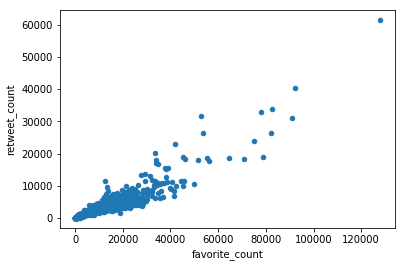

In [20]:
#Visualization comparing the favorite & retweet counts
%matplotlib inline
df_master.plot(x='favorite_count', y='retweet_count', kind='scatter')

From the above plot we can see if the number of favorite_count increased then the number of retweet_count will increase a little bit not that much increasing.